In [1]:
import pandas as pd
import sqlite3
from pandas.plotting import scatter_matrix

# Exercise 06 : Scatter Matrix

In [2]:
conn = sqlite3.connect('../data/checking-logs.sqlite')

In [3]:
query = """
SELECT 
  c.uid,
  AVG(CAST((julianday(c.timestamp) - julianday(d.deadlines, 'unixepoch')) * 24 AS INTEGER)) as avg_diff,
  (SELECT COUNT(*) FROM pageviews p WHERE p.uid = c.uid) as pageviews,
  num_commits
FROM checker c
JOIN deadlines d ON c.labname = d.labs
JOIN (
  SELECT uid, COUNT(*) AS num_commits
  FROM checker
  WHERE labname != 'project1'
  GROUP BY uid
) AS ch
ON c.uid = ch.uid
WHERE c.uid LIKE 'user_%'
  AND c.status = 'ready'
  AND c.numTrials = 1
  AND EXISTS (SELECT 1 FROM pageviews p WHERE p.uid = c.uid)
  AND labname != 'project1'
GROUP BY c.uid
"""
df = pd.read_sql(query, con=conn)
conn.close()
df

,uid,avg_diff,pageviews,num_commits
0,user_1,-64.400000,28,62
1,user_10,-74.800000,89,20
2,user_14,-159.000000,143,61
3,user_17,-61.600000,47,51
4,user_18,-5.666667,3,5
5,user_19,-98.750000,16,118
6,user_21,-95.500000,10,65
7,user_25,-92.600000,179,79
8,user_28,-86.400000,149,60
9,user_3,-105.400000,317,18


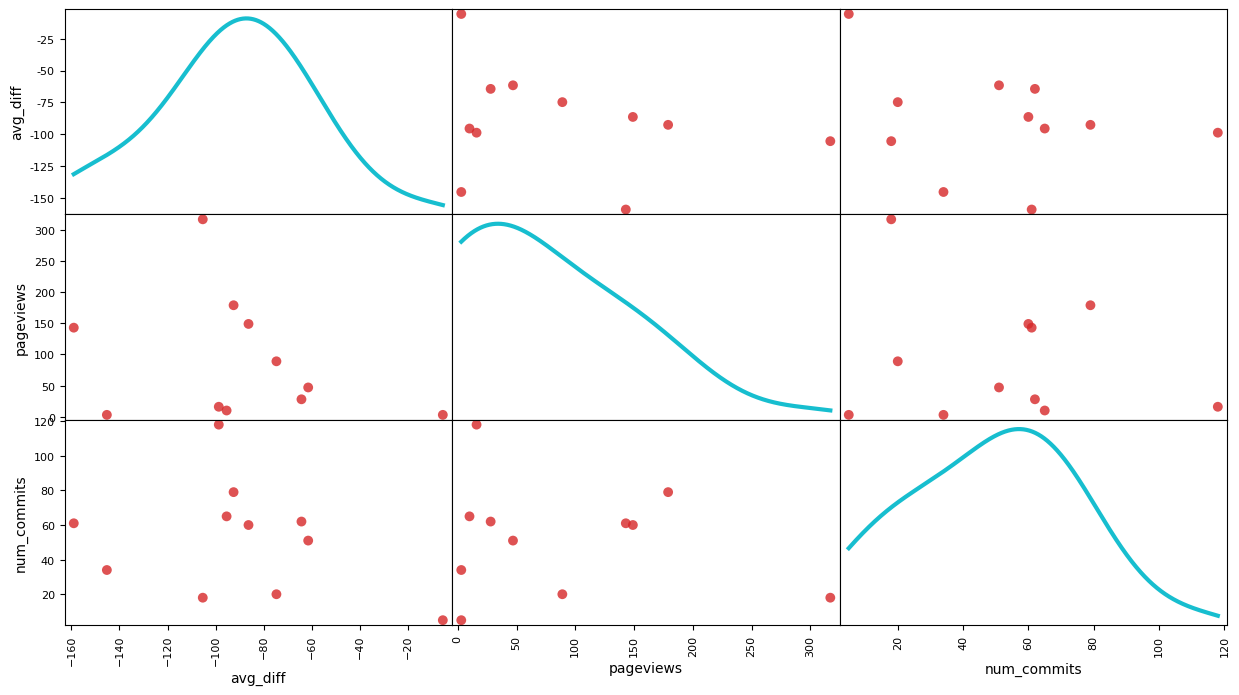

In [4]:
ax = scatter_matrix(df[['avg_diff', 'pageviews', 'num_commits']], 
                   alpha=0.8, 
                   figsize=(15, 8), 
                   diagonal='kde',
                   s=200, 
                   color="tab:red")

for i in range(len(ax)):
    for j in range(len(ax)):
        if i == j:
            for line in ax[i][j].get_lines():
                line.set_linewidth(3)
                line.set_color("tab:cyan")

Can we say that if a user has a low number of pageviews then they likely have a low number of commits? NO

Can we say that if a user has a low number of pageviews then they likely have a small average difference between the first commit and the lab deadline? NO

Can we say that there are many users with a low number of commits and a few with a high number of commits? YES

Can we say that there are many users with a small average difference and a few with a large average difference? NO